It might be useful to run 'pip3 install &lt;library&gt; --upgrade" to make sure you have latest versions of pandas, matplotlib, etc.

In [1]:
import gzip            # can uncompress gzipped files, useful for accessing the pleiades data
import io              # useful routines for input/output
import numpy as np
import pandas as pd    # for working with "rows/columns" oriented data
import pymysql.cursors # 
import sqlite3         # an SQL database
import urllib.request  # for loading documents using http

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [2]:
# Connect to the database
# I will email you the file sebastia_adsq_params.txt . It's just a four line text file.
# Put that in directory and the following line will read it.
db_params = open("sebastia_adsqro_params.txt").read().split()

In [3]:
# Connect to the database

connection = pymysql.connect(host=db_params[0],
                             user=db_params[1],
                             password=db_params[2],
                             db=db_params[3],
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [15]:
sql = "select * from ramphs"

with connection.cursor() as cursor:

    cursor.execute(sql)
    names = [ x[0] for x in cursor.description]
    result = cursor.fetchall()

df = pd.DataFrame(result, columns = names)

In [51]:
pseudo_triples = pd.melt(df,id_vars='id').sort_values('id')
pseudo_triples
for t in pseudo_triples.iterrows():
    s = 'ex:%s' % t[1]['id']
    p = 'ex:%s' % t[1]['variable']
    if t[1]['variable'] in ['arenamajor','arenaminor','capacity','elevation','extmajor','extminor','longitude','latitude']:
        print('%s %s %s' % (s,p,t[1]['value']))
    else:
        print('%s %s "%s"' % (s,p,t[1]['value']))

ex:agenAmphitheater ex:elevation 52.0
ex:agenAmphitheater ex:latitude 44.20654500000
ex:agenAmphitheater ex:modcountry "France"
ex:agenAmphitheater ex:capacity 15000.0
ex:agenAmphitheater ex:youtube ""
ex:agenAmphitheater ex:chronogrp "Imperial"
ex:agenAmphitheater ex:longitude 0.6221220000
ex:agenAmphitheater ex:welch ""
ex:agenAmphitheater ex:italyregion ""
ex:agenAmphitheater ex:certainty ""
ex:agenAmphitheater ex:golvin ""
ex:agenAmphitheater ex:arenamajor nan
ex:agenAmphitheater ex:pleiades "http://pleiades.stoa.org/places/138169"
ex:agenAmphitheater ex:extmajor nan
ex:agenAmphitheater ex:province "aquitania"
ex:agenAmphitheater ex:pleiades_id "138169"
ex:agenAmphitheater ex:label "Agen"
ex:agenAmphitheater ex:type "amphitheater"
ex:agenAmphitheater ex:title "Amphitheater at Agen"
ex:agenAmphitheater ex:extminor nan
ex:agenAmphitheater ex:arenaminor nan
ex:ainHedjahAmphitheater ex:longitude 9.2306320000
ex:ainHedjahAmphitheater ex:arenamajor 43.0
ex:ainHedjahAmphitheater ex:certai

In [53]:
r3s = rdflib.Graph()
pseudo_triples = pd.melt(df,id_vars='id').sort_values('id')
pseudo_triples
for t in pseudo_triples.iterrows():
    s = 'ex:%s' % t[1]['id']
    p = 'ex:%s' % t[1]['variable']
    if t[1]['variable'] in ['arenamajor','arenaminor','capacity','elevation','extmajor','extminor','longitude','latitude']:
        print('%s %s %s' % (s,p,t[1]['value']))
    else:
        print('%s %s "%s"' % (s,p,t[1]['value']))

NameError: name 'rdflib' is not defined

In [5]:
list(df) # this shows column names.

['id',
 'title',
 'label',
 'pleiades',
 'welch',
 'golvin',
 'type',
 'capacity',
 'modcountry',
 'province',
 'italyregion',
 'chronogrp',
 'certainty',
 'youtube',
 'extmajor',
 'extminor',
 'arenamajor',
 'arenaminor',
 'latitude',
 'longitude',
 'elevation',
 'pleiades_id']

In [6]:
df[['id','modcountry','capacity']] # show just a few columns

,id,modcountry,capacity
0,duraEuroposAmphitheater,Syria,1000.0
1,arlesAmphitheater,France,20000.0
2,lyonAmphitheater,France,20000.0
3,ludusMagnusArena,Italy,NaN
4,romeFlavianAmphitheater,Italy,50000.0
5,romeAmphitheatrumCastrense,Italy,7000.0
6,eleutheropolisAmphitheater,Israel,3500.0
7,pompeiiAmphitheater,Italy,22000.0
8,meridaAmphitheater,Spain,15000.0
9,newsteadAmphitheater,United Kingdom,1500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112022ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1121b7940>]], dtype=object)

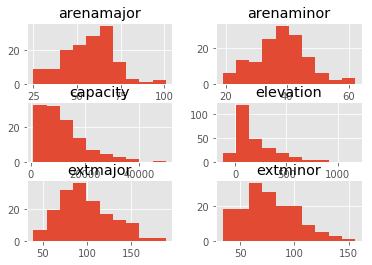

In [7]:
df.hist() # make a histogram of all numeric columns.

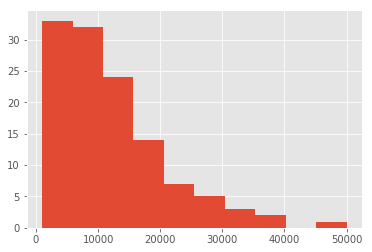

In [8]:
df['capacity'].hist()

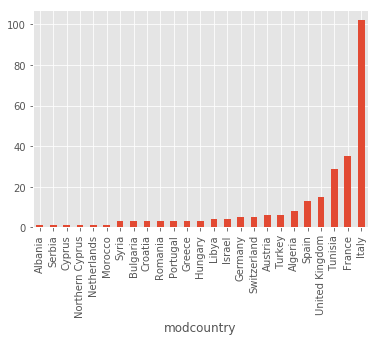

In [9]:
# groupby is like its SQL equivalent. Only trick is that 'modcountry' is no
# longer a column in the dataframe.
# try df.groupby('modcountry').count() to see what I mean.
# so... I sort by the counts in the id column,
# then create a series of just those number
# then plot that using a barchart.
df.groupby('modcountry').count().sort_values(by = 'id')['id'].plot.bar()

# the big issue that I would have discussed in class is the difference between
# a histogram that display continuous numeric data and a bar chart that displays
# quantities associated with categories.

In [10]:
# the key here is reset_index .
# show outout of "df.sort_values('capacity')" . NOte the value in the left most column, the index.
df_sorted = df.sort_values('capacity').reset_index(drop=True).dropna(subset=['capacity'])


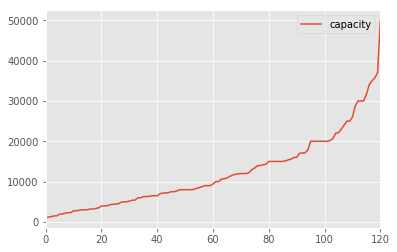

In [11]:
# if index re-ordered and null values dropped, I can make an "index plot". That's a visualization
# of the ordered values of capacity. Showing that colosseum in rome is an outlier
df_sorted.plot(x = df_sorted.index, y = 'capacity' )

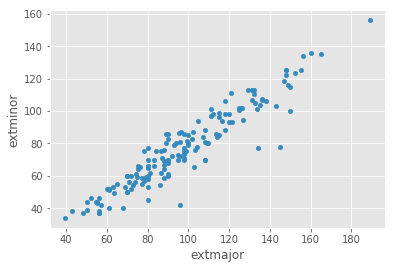

In [12]:
# a simple scatter plot with na removed.

df.dropna(subset=['extmajor','extminor']).plot.scatter(x = 'extmajor', y = 'extminor')

In [13]:
# connection.commit()
# connection.close()